<h1>Notebook para Streptosporangiaceae </h1>

In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import hamming
import gudhi as gd
import seaborn as sns
from statistics import mode
import multiprocessing
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import gudhi as gd
# from scipy.spatial.distance import hamming
import plotly.graph_objs as go
import networkx as nx
import plotly.graph_objects as go
import plotly.io as pio
from networkx.utils import not_implemented_for, pairwise
from concurrent.futures import ThreadPoolExecutor, as_completed
import plotly
import plotly.express as px
from module_functions import *

<h2>Se extrae la información </h2>

In [3]:
info=pd.read_csv('data/pscpStrepto.blast',sep='\t',header=None)
minimum_score=100
info=info[info[11]>=minimum_score]
info.reset_index(drop=True,inplace=True)
info=info.loc[:,0:1]
names=pd.read_csv('data/Strepto.ids',sep='\t',dtype='object',header=None)

<h2>Se crean los data frames</h2>

In [4]:
info_by_pathway_and_genomes_directions=get_info_by_pathway_and_all_genomes_directions(info)

In [5]:
df_by_pathway,df_by_pathway_drop_duplicate,representative_genomes=get_df_by_pathway(info_by_pathway_and_genomes_directions)

<h2> Se crea el complejo simplicial</h2>

In [6]:
complex_pathways=get_complex_by_pathways(df_by_pathway_drop_duplicate)

In [9]:
#plot_all_bar_code_pathways(complex_pathways)

<h2>Se buscan los uno hoyos</h2>

In [7]:
holes_by_pathway=change_vertex_to_code_per_path(holes_pathway_strepto(),df_by_pathway_drop_duplicate)

In [8]:
holes_by_pathway['\ufeffGlycolysis']=[]

In [9]:
resum=get_resum_df(df_by_pathway,representative_genomes,names,complex_pathways,holes_by_pathway)
resum

/opt/conda/envs/TDA/lib/python3.7/site-packages/pandas/core/internals/blocks.py:937: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)


,num_columnas,num_hoyos,ciclos,ciclos por genero,duración hoyos
Glycolysis,10,111,[[[Microbispora rosea subsp. nonnitritogenes s...,"[[[Microbispora, Microbispora, Microbispora, M...",[1.0]
﻿Glycolysis,1,0,[],[],[]
TCA,11,99,"[[[Microbispora sp. ATCC PTA-5024 KI866522.1, ...","[[[Microbispora, Streptosporangium, Microbispo...","[1.0, 2.0]"
3PGA_AMINOACIDS,6,133,"[[[Microbispora sp. H10670 JABBWW010000001.1, ...","[[[Microbispora, Microbispora, Microbispora, M...",[1.0]
ALPHAKETOGLUTARATE_AMINOACIDS,15,112,"[[[Streptosporangium sp. caverna CP029711.1, S...","[[[Streptosporangium, Streptosporangium], [Mic...","[1.0, 2.0]"
E4P_AMINO_ACIDS,19,109,[[[Herbidospora cretacea strain NRRL B-16917 J...,"[[[Herbidospora, Herbidospora, Herbidospora, H...","[1.0, 2.0]"
OXALACETATE_AMINOACIDS,19,163,[[[Microbispora rosea subsp. nonnitritogenes s...,"[[[Microbispora, Microbispora, Microbispora, M...","[1.0, 2.0, 3.0]"
PPP,8,97,[[Streptosporangiaceae bacterium JOPF063 JASHQ...,"[[Streptosporangiaceae, Streptosporangiaceae, ...",[1.0]
PYR_THR_AA,10,112,"[[[Nonomuraea coxensis DSM 45129 KB903939.1, N...","[[[Nonomuraea, Nonomuraea, Nonomuraea, Nonomur...",[1.0]
R5P_AMINOACIDS,10,71,"[[[Thermobispora bispora DSM 43833 CP001874.1,...","[[[Thermobispora, Thermobispora, Microbispora,...",[1.0]


<h2>Se ven los elementos que hacen el hoyo</h2>

In [10]:
df_pathway_make_hole=get_df_by_pathway_make_hole(df_by_pathway_drop_duplicate,holes_by_pathway)

In [11]:
traduced_df(df_pathway_make_hole['R5P_AMINOACIDS'][0],names)

,histidinol_phosphatase,phosphoribosyl_AMP_cyclohydrolase,imidazole_glycerol_phosphate_synthase_H,phosphoribosyl_ATP_diphosphatase,ribosephosphate_pyrophosphokinase,ATP_phosphoribosyltransferase,imidazoleglycerol_phosphate_dehydratase,histidinolphosphate_aminotransferase,phosphoribosyl_isomerase_A,histidinol_dehydrogenase
R5P_AMINOACIDS,,,,,,,,,,
Thermobispora bispora DSM 43833 CP001874.1,1,1,2,0,2,1,1,2,1,1
Microbispora rosea subsp. nonnitritogenes strain NRRL B-2631,1,1,2,1,2,1,1,3,1,1
Streptosporangium amethystogenes strain NRRL B-2639 JOEQ01000001.1,1,1,2,1,2,1,1,2,1,1
Streptosporangiaceae bacterium LS_FP_2_bin.73 JAICWX010000100.1,1,1,2,0,2,1,1,3,1,1


usetex mode requires TeX.


<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

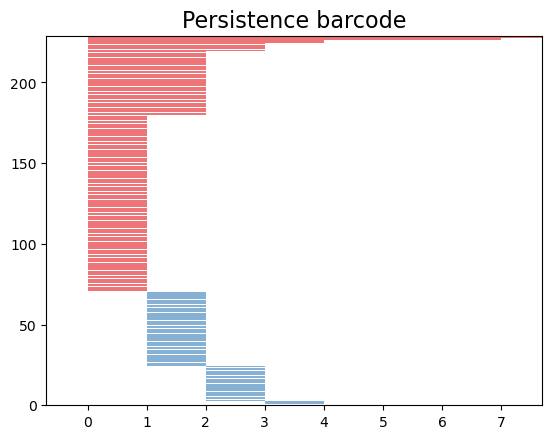

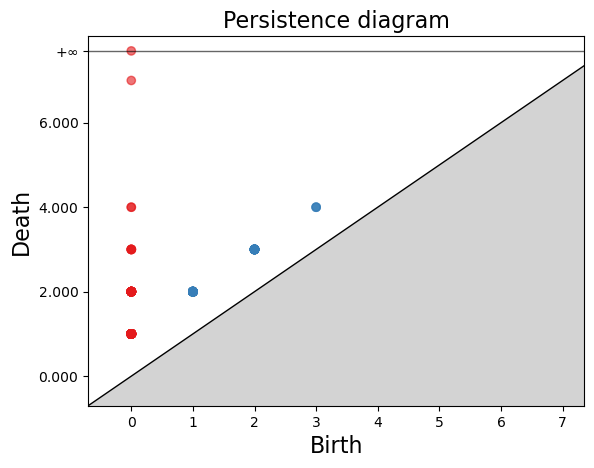

In [12]:
gd.plot_persistence_barcode(complex_pathways['R5P_AMINOACIDS'][0])
gd.plot_persistence_diagram(complex_pathways['R5P_AMINOACIDS'][0])

In [30]:
visualize_simplicial_complex(complex_pathways['R5P_AMINOACIDS'][1],3,'R5P_AMINOACIDS','Strepto')

plotly.graph_objs._figure.Figure

<h2>Se buscan uno hoyos pero al separar por genero y ruta metabólica</h2>

In [13]:
df_by_genus_pathway,df_by_genus_pathway_drop_duplicate,representative_genomes_genus_pathway=get_df_by_genus_pathway(df_by_pathway,names)
complex_genus_pathways=get_complex_by_pathways(df_by_genus_pathway_drop_duplicate)

In [14]:
complex_genus_R5P_AMINOACIDS={}
df_by_genus_R5P_AMINOACIDS_drop_duplicate={}
representative_genomes_by_genus_R5P_AMINOACIDS={}
df_by_genus_pathway_R5P_AMINOACIDS={}
for key in complex_genus_pathways.keys():
    if 'R5P_AMINOACIDS' in key:
        df_by_genus_pathway_R5P_AMINOACIDS[key]=df_by_genus_pathway[key]
        complex_genus_R5P_AMINOACIDS[key]=complex_genus_pathways[key]
        df_by_genus_R5P_AMINOACIDS_drop_duplicate[key]=df_by_genus_pathway_drop_duplicate[key]
        representative_genomes_by_genus_R5P_AMINOACIDS=representative_genomes_genus_pathway[key]

In [9]:
holes_R5P_AMINOACIDS=get_holes_by_pathways(complex_genus_R5P_AMINOACIDS,df_by_genus_R5P_AMINOACIDS_drop_duplicate,
                                          names,representative_genomes_genus_pathway)

se buscan ciclos en el tiempo 2.0 para Streptosporangium_R5P_AMINOACIDS
Se encontró el ciclo [9, 3, 1, 0] en el tiempo 1.0 para Streptosporangium_R5P_AMINOACIDS
Se encontró el ciclo [4, 7, 3, 1] en el tiempo 1.0 para Streptosporangium_R5P_AMINOACIDS
se buscan ciclos en el tiempo 2.0 para Nonomuraea_R5P_AMINOACIDS
Se encontró el ciclo [5, 10, 2, 1] en el tiempo 1.0 para Nonomuraea_R5P_AMINOACIDS
Se encontró el ciclo [14, 18, 5, 1] en el tiempo 1.0 para Nonomuraea_R5P_AMINOACIDS
Se encontró el ciclo [7, 2, 1, 0] en el tiempo 1.0 para Nonomuraea_R5P_AMINOACIDS
se buscan ciclos en el tiempo 2.0 para Microbispora_R5P_AMINOACIDS
Se encontró el ciclo [10, 2, 7, 3] en el tiempo 1.0 para Microbispora_R5P_AMINOACIDS
se buscan ciclos en el tiempo 2.0 para Acrocarpospora_R5P_AMINOACIDS
Se encontró el ciclo [4, 2, 1, 0] en el tiempo 1.0 para Acrocarpospora_R5P_AMINOACIDS
se buscan ciclos en el tiempo 2.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [43, 44, 24, 17] en el tiempo 1.0

In [10]:
resum_R5P_AMINOACIDS=get_resum_df(df_by_genus_pathway_R5P_AMINOACIDS,complex_genus_R5P_AMINOACIDS,holes_R5P_AMINOACIDS)
resum_R5P_AMINOACIDS

/opt/conda/envs/TDA/lib/python3.7/site-packages/pandas/core/internals/blocks.py:937: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)


,num_columnas,num_hoyos,ciclos,ciclos por genero,duración hoyos
Streptosporangium_R5P_AMINOACIDS,10,2,"[[[Streptosporangium sp. caverna CP029711.1, S...","[[[Streptosporangium, Streptosporangium, Strep...",[1.0]
Thermobispora_R5P_AMINOACIDS,10,0,[],[],[]
Nonomuraea_R5P_AMINOACIDS,10,3,[[[Nonomuraea deserti strain KC310 SMKO0100010...,"[[[Nonomuraea, Nonomuraea, Nonomuraea, Nonomur...",[1.0]
Microbispora_R5P_AMINOACIDS,10,1,[[[Microbispora hainanensis strain DSM 45428 V...,"[[[Microbispora, Microbispora], [Microbispora,...",[1.0]
Herbidospora_R5P_AMINOACIDS,10,0,[],[],[]
Microtetraspora_R5P_AMINOACIDS,10,0,[],[],[]
Planomonospora_R5P_AMINOACIDS,10,0,[],[],[]
Planobispora_R5P_AMINOACIDS,10,0,[],[],[]
Thermoactinospora_R5P_AMINOACIDS,10,0,[],[],[]
Sphaerisporangium_R5P_AMINOACIDS,10,0,[],[],[]


In [ ]:
1+1

In [ ]:
holes_by_genus_pathway=get_holes_by_pathways(complex_genus_pathways,df_by_genus_pathway_drop_duplicate)

se buscan ciclos en el tiempo 3.0 para Streptosporangium_Glycolysis
se buscan ciclos en el tiempo 2.0 para Nonomuraea_Glycolysis
se buscan ciclos en el tiempo 2.0 para Microbispora_Glycolysis
se buscan ciclos en el tiempo 2.0 para Herbidospora_Glycolysis
Se encontró el ciclo [2, 4, 1, 0] en el tiempo 1.0 para Herbidospora_Glycolysis
Se encontró el ciclo [22, 2, 17, 9] en el tiempo 1.0 para Microbispora_Glycolysis
Se encontró el ciclo [22, 21, 10, 9] en el tiempo 1.0 para Microbispora_Glycolysis
se buscan ciclos en el tiempo 3.0 para Sphaerisporangium_Glycolysis
se buscan ciclos en el tiempo 3.0 para Streptosporangiaceae_Glycolysis
se buscan ciclos en el tiempo 2.0 para Nonomuraea_TCA
se buscan ciclos en el tiempo 2.0 para Microbispora_TCA
Se encontró el ciclo [12, 2, 9, 8] en el tiempo 1.0 para Microbispora_TCA
Se encontró el ciclo [14, 12, 8, 6] en el tiempo 1.0 para Microbispora_TCA
Se encontró el ciclo [11, 17, 10, 6] en el tiempo 1.0 para Nonomuraea_TCA
Se encontró el ciclo [15, 41

In [ ]:
resum_genus=get_resum_df(df_by_genus_pathway,complex_genus_pathways,holes_by_genus_pathway)
resum_genus

In [ ]:

1.-El TDA en secuencias de ADN ha sido capaz de encontrar perdida o ganancia de genes. 

2.- De dos grupos de genomas Ornithimicrobeace y Streptoporangiace y sus respectivas rutas metabolicas  conservadas al aplicar homología persistente se obtuvieron diagramas de persitencia

3.- En la ruta de R5P_AMINOACIDS se identifico meidante los uno hoyos una ganancia conocida de la enzima PriA en el linaje Streptoporangiace acompañada de una perdida de phosphoribosyl_ATP_diphosphatase

4.-Historias evolutivas de las dos familias taxonomicas de actinobacteria Ornithimicrobeace y Streptoporangiace difieren segun los diagramas de persitencia en sus rutas metabolicas conservadas

5.-La topologia debida a la perdida o ganacia de genes en rutas metabolicas conservadas difiere en dos linajes de actinobacterias 
2=4=5 cambiar


In [ ]:
se buscan ciclos en el tiempo 3.0 para Streptosporangium_Glycolysis
se buscan ciclos en el tiempo 2.0 para Nonomuraea_Glycolysis
se buscan ciclos en el tiempo 2.0 para Microbispora_Glycolysis
se buscan ciclos en el tiempo 2.0 para Herbidospora_Glycolysis
Se encontró el ciclo [2, 4, 1, 0] en el tiempo 1.0 para Herbidospora_Glycolysis
Se encontró el ciclo [22, 2, 17, 9] en el tiempo 1.0 para Microbispora_Glycolysis
Se encontró el ciclo [22, 21, 10, 9] en el tiempo 1.0 para Microbispora_Glycolysis
se buscan ciclos en el tiempo 3.0 para Sphaerisporangium_Glycolysis
se buscan ciclos en el tiempo 3.0 para Streptosporangiaceae_Glycolysis
se buscan ciclos en el tiempo 2.0 para Nonomuraea_TCA
se buscan ciclos en el tiempo 2.0 para Microbispora_TCA
Se encontró el ciclo [12, 2, 9, 8] en el tiempo 1.0 para Microbispora_TCA
Se encontró el ciclo [14, 12, 8, 6] en el tiempo 1.0 para Microbispora_TCA
Se encontró el ciclo [11, 17, 10, 6] en el tiempo 1.0 para Nonomuraea_TCA
Se encontró el ciclo [15, 41, 12, 10] en el tiempo 1.0 para Nonomuraea_TCA
Se encontró el ciclo [18, 12, 10, 6] en el tiempo 1.0 para Nonomuraea_TCA
Se encontró el ciclo [16, 4, 10, 6] en el tiempo 1.0 para Nonomuraea_TCA
Se encontró el ciclo [31, 46, 19, 15] en el tiempo 1.0 para Nonomuraea_TCA
Se encontró el ciclo [12, 41, 34, 50, 0, 33, 10] en el tiempo 1.0 para Nonomuraea_TCA
Se encontró el ciclo [16, 13, 9, 2] en el tiempo 1.0 para Nonomuraea_TCA
Se encontró el ciclo [19, 15, 10, 6] en el tiempo 1.0 para Nonomuraea_TCA
Se encontró el ciclo [9, 18, 6, 2] en el tiempo 1.0 para Nonomuraea_TCA
Se encontró el ciclo [30, 31, 15, 10] en el tiempo 1.0 para Nonomuraea_TCA
Se encontró el ciclo [29, 20, 16, 13] en el tiempo 1.0 para Nonomuraea_TCA
se buscan ciclos en el tiempo 3.0 para Nonomuraea_TCA
Se encontró el ciclo [6, 8, 1, 2] en el tiempo 2.0 para Sphaerisporangium_Glycolysis
Se encontró el ciclo [10, 9, 6, 2] en el tiempo 2.0 para Sphaerisporangium_Glycolysis
Se encontró el ciclo [4, 8, 10, 6] en el tiempo 2.0 para Streptosporangium_Glycolysis
se buscan ciclos en el tiempo 2.0 para Herbidospora_TCA
Se encontró el ciclo [2, 3, 1, 0] en el tiempo 1.0 para Herbidospora_TCA
se buscan ciclos en el tiempo 2.0 para Sphaerisporangium_TCA
Se encontró el ciclo [4, 6, 2, 5] en el tiempo 1.0 para Sphaerisporangium_TCA
se buscan ciclos en el tiempo 3.0 para Streptosporangiaceae_TCA
se buscan ciclos en el tiempo 3.0 para Streptosporangium_3PGA_AMINOACIDS
se buscan ciclos en el tiempo 2.0 para Nonomuraea_3PGA_AMINOACIDS
se buscan ciclos en el tiempo 2.0 para Microbispora_3PGA_AMINOACIDS
se buscan ciclos en el tiempo 3.0 para Sphaerisporangium_3PGA_AMINOACIDS
Se encontró el ciclo [6, 1, 4, 7, 2] en el tiempo 2.0 para Sphaerisporangium_3PGA_AMINOACIDS
Se encontró el ciclo [21, 14, 9, 11] en el tiempo 1.0 para Microbispora_3PGA_AMINOACIDS
Se encontró el ciclo [21, 11, 10, 0] en el tiempo 1.0 para Microbispora_3PGA_AMINOACIDS
Se encontró el ciclo [12, 20, 10, 0] en el tiempo 1.0 para Microbispora_3PGA_AMINOACIDS
Se encontró el ciclo [17, 22, 16, 8] en el tiempo 1.0 para Microbispora_3PGA_AMINOACIDS
se buscan ciclos en el tiempo 3.0 para Microbispora_3PGA_AMINOACIDS
se buscan ciclos en el tiempo 2.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [20, 19, 14, 4] en el tiempo 1.0 para Nonomuraea_Glycolysis
Se encontró el ciclo [32, 14, 19, 11] en el tiempo 1.0 para Nonomuraea_Glycolysis
Se encontró el ciclo [34, 5, 31, 8] en el tiempo 1.0 para Nonomuraea_Glycolysis
Se encontró el ciclo [32, 39, 29, 11] en el tiempo 1.0 para Nonomuraea_Glycolysis
Se encontró el ciclo [32, 14, 4, 12] en el tiempo 1.0 para Nonomuraea_Glycolysis
Se encontró el ciclo [34, 32, 12, 8] en el tiempo 1.0 para Nonomuraea_Glycolysis
se buscan ciclos en el tiempo 3.0 para Nonomuraea_Glycolysis
se buscan ciclos en el tiempo 2.0 para Nonomuraea_ALPHAKETOGLUTARATE_AMINOACIDS
se buscan ciclos en el tiempo 2.0 para Microbispora_ALPHAKETOGLUTARATE_AMINOACIDS
se buscan ciclos en el tiempo 6.0 para Herbidospora_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [4, 2, 1, 0] en el tiempo 5.0 para Herbidospora_ALPHAKETOGLUTARATE_AMINOACIDS
se buscan ciclos en el tiempo 4.0 para Sphaerisporangium_ALPHAKETOGLUTARATE_AMINOACIDS
se buscan ciclos en el tiempo 5.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [9, 39, 3, 1] en el tiempo 1.0 para Nonomuraea_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [45, 32, 11, 3] en el tiempo 1.0 para Nonomuraea_ALPHAKETOGLUTARATE_AMINOACIDS
se buscan ciclos en el tiempo 3.0 para Nonomuraea_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [22, 0, 20, 9] en el tiempo 1.0 para Microbispora_ALPHAKETOGLUTARATE_AMINOACIDS
se buscan ciclos en el tiempo 15.0 para Microbispora_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [11, 9, 3, 2] en el tiempo 2.0 para Streptosporangium_3PGA_AMINOACIDS
se buscan ciclos en el tiempo 6.0 para Streptosporangium_E4P_AMINO_ACIDS
se buscan ciclos en el tiempo 2.0 para Nonomuraea_E4P_AMINO_ACIDS
Se encontró el ciclo [19, 43, 3, 32] en el tiempo 1.0 para Nonomuraea_E4P_AMINO_ACIDS
Se encontró el ciclo [60, 39, 51, 37] en el tiempo 1.0 para Nonomuraea_E4P_AMINO_ACIDS
se buscan ciclos en el tiempo 3.0 para Nonomuraea_E4P_AMINO_ACIDS
se buscan ciclos en el tiempo 4.0 para Microbispora_E4P_AMINO_ACIDS
Se encontró el ciclo [7, 4, 1, 2] en el tiempo 3.0 para Sphaerisporangium_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [8, 10, 7, 2] en el tiempo 3.0 para Sphaerisporangium_ALPHAKETOGLUTARATE_AMINOACIDS
se buscan ciclos en el tiempo 4.0 para Microtetraspora_E4P_AMINO_ACIDS
Se encontró el ciclo [3, 4, 6, 2] en el tiempo 3.0 para Microtetraspora_E4P_AMINO_ACIDS
Se encontró el ciclo [1, 8, 5, 0] en el tiempo 5.0 para Streptosporangium_E4P_AMINO_ACIDS
se buscan ciclos en el tiempo 4.0 para Sphaerisporangium_E4P_AMINO_ACIDS
se buscan ciclos en el tiempo 5.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
se buscan ciclos en el tiempo 6.0 para Streptosporangium_OXALACETATE_AMINOACIDS
Se encontró el ciclo [9, 10, 7, 5] en el tiempo 3.0 para Sphaerisporangium_E4P_AMINO_ACIDS
Se encontró el ciclo [10, 6, 4, 7] en el tiempo 3.0 para Sphaerisporangium_E4P_AMINO_ACIDS
se buscan ciclos en el tiempo 4.0 para Nonomuraea_OXALACETATE_AMINOACIDS
Se encontró el ciclo [19, 4, 2, 8] en el tiempo 2.0 para Microbispora_3PGA_AMINOACIDS
Se encontró el ciclo [11, 23, 8, 19, 10] en el tiempo 2.0 para Microbispora_3PGA_AMINOACIDS
Se encontró el ciclo [8, 9, 2, 0] en el tiempo 5.0 para Streptosporangium_OXALACETATE_AMINOACIDS
se buscan ciclos en el tiempo 7.0 para Streptosporangium_OXALACETATE_AMINOACIDS
Se encontró el ciclo [10, 22, 18, 64, 1] en el tiempo 3.0 para Nonomuraea_OXALACETATE_AMINOACIDS
Se encontró el ciclo [10, 34, 35, 60, 1] en el tiempo 3.0 para Nonomuraea_OXALACETATE_AMINOACIDS
se buscan ciclos en el tiempo 5.0 para Nonomuraea_OXALACETATE_AMINOACIDS
Se encontró el ciclo [1, 13, 2, 3] en el tiempo 6.0 para Streptosporangium_OXALACETATE_AMINOACIDS
se buscan ciclos en el tiempo 3.0 para Microbispora_OXALACETATE_AMINOACIDS
Se encontró el ciclo [16, 10, 21, 9] en el tiempo 2.0 para Microbispora_OXALACETATE_AMINOACIDS
se buscan ciclos en el tiempo 5.0 para Sphaerisporangium_OXALACETATE_AMINOACIDS
se buscan ciclos en el tiempo 5.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [31, 119, 90, 69] en el tiempo 4.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
se buscan ciclos en el tiempo 6.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
se buscan ciclos en el tiempo 2.0 para Nonomuraea_PPP
se buscan ciclos en el tiempo 2.0 para Herbidospora_PPP
Se encontró el ciclo [4, 2, 1, 0] en el tiempo 1.0 para Herbidospora_PPP
Se encontró el ciclo [6, 7, 1, 4, 3] en el tiempo 4.0 para Sphaerisporangium_OXALACETATE_AMINOACIDS
se buscan ciclos en el tiempo 2.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [55, 119, 90, 49] en el tiempo 5.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
se buscan ciclos en el tiempo 7.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
se buscan ciclos en el tiempo 2.0 para Streptosporangium_PYR_THR_AA
Se encontró el ciclo [15, 9, 2, 0] en el tiempo 1.0 para Streptosporangium_PYR_THR_AA
se buscan ciclos en el tiempo 4.0 para Streptosporangium_PYR_THR_AA
se buscan ciclos en el tiempo 3.0 para Nonomuraea_PYR_THR_AA
se buscan ciclos en el tiempo 3.0 para Microbispora_PYR_THR_AA
se buscan ciclos en el tiempo 4.0 para Streptosporangiaceae_PYR_THR_AA
se buscan ciclos en el tiempo 2.0 para Streptosporangium_R5P_AMINOACIDS
Se encontró el ciclo [9, 3, 1, 0] en el tiempo 1.0 para Streptosporangium_R5P_AMINOACIDS
Se encontró el ciclo [4, 7, 3, 1] en el tiempo 1.0 para Streptosporangium_R5P_AMINOACIDS
se buscan ciclos en el tiempo 2.0 para Nonomuraea_R5P_AMINOACIDS
Se encontró el ciclo [5, 10, 2, 1] en el tiempo 1.0 para Nonomuraea_R5P_AMINOACIDS
Se encontró el ciclo [14, 18, 5, 1] en el tiempo 1.0 para Nonomuraea_R5P_AMINOACIDS
Se encontró el ciclo [7, 2, 1, 0] en el tiempo 1.0 para Nonomuraea_R5P_AMINOACIDS
se buscan ciclos en el tiempo 8.0 para Microbispora_OXALACETATE_AMINOACIDS
se buscan ciclos en el tiempo 2.0 para Microbispora_R5P_AMINOACIDS
Se encontró el ciclo [10, 2, 7, 3] en el tiempo 1.0 para Microbispora_R5P_AMINOACIDS
se buscan ciclos en el tiempo 2.0 para Acrocarpospora_R5P_AMINOACIDS
Se encontró el ciclo [4, 2, 1, 0] en el tiempo 1.0 para Acrocarpospora_R5P_AMINOACIDS
se buscan ciclos en el tiempo 2.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [26, 0, 25, 2] en el tiempo 3.0 para Microbispora_E4P_AMINO_ACIDS
Se encontró el ciclo [24, 15, 26, 7] en el tiempo 3.0 para Microbispora_E4P_AMINO_ACIDS
Se encontró el ciclo [12, 24, 7, 2] en el tiempo 3.0 para Microbispora_E4P_AMINO_ACIDS
Se encontró el ciclo [17, 15, 9, 8] en el tiempo 3.0 para Microbispora_E4P_AMINO_ACIDS
Se encontró el ciclo [96, 77, 82, 13] en el tiempo 1.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [79, 37, 45, 24] en el tiempo 1.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [61, 65, 10, 0] en el tiempo 1.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [113, 82, 13, 11] en el tiempo 1.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [113, 1, 56, 11] en el tiempo 1.0 para Streptosporangiaceae_PPP
se buscan ciclos en el tiempo 3.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [16, 34, 15, 1] en el tiempo 1.0 para Nonomuraea_PPP
Se encontró el ciclo [28, 25, 6, 0] en el tiempo 1.0 para Nonomuraea_PPP
Se encontró el ciclo [16, 9, 10, 1] en el tiempo 1.0 para Nonomuraea_PPP
Se encontró el ciclo [6, 11, 2, 0] en el tiempo 1.0 para Nonomuraea_PPP
Se encontró el ciclo [16, 34, 13, 2] en el tiempo 1.0 para Nonomuraea_PPP
Se encontró el ciclo [2, 16, 1, 0] en el tiempo 1.0 para Nonomuraea_PPP
Se encontró el ciclo [6, 3, 1, 0] en el tiempo 1.0 para Nonomuraea_PPP
Se encontró el ciclo [16, 7, 11, 2] en el tiempo 1.0 para Nonomuraea_PPP
Se encontró el ciclo [16, 7, 3, 1] en el tiempo 1.0 para Nonomuraea_PPP
Se encontró el ciclo [28, 32, 10, 1] en el tiempo 1.0 para Nonomuraea_PPP
se buscan ciclos en el tiempo 3.0 para Nonomuraea_PPP
Se encontró el ciclo [43, 44, 24, 17] en el tiempo 1.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [53, 11, 51, 6] en el tiempo 1.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [63, 27, 51, 8] en el tiempo 1.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [51, 30, 17, 8] en el tiempo 1.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [53, 11, 46, 4] en el tiempo 1.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [76, 66, 43, 1] en el tiempo 1.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [8, 51, 6, 1] en el tiempo 1.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [6, 53, 4, 1] en el tiempo 1.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [43, 17, 8, 1] en el tiempo 1.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [4, 5, 3, 1] en el tiempo 1.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [8, 46, 4, 1] en el tiempo 1.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [41, 25, 14, 69] en el tiempo 1.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [31, 61, 25, 41] en el tiempo 1.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [92, 69, 14, 98] en el tiempo 1.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [92, 54, 41, 69] en el tiempo 1.0 para Streptosporangiaceae_R5P_AMINOACIDS
se buscan ciclos en el tiempo 3.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [54, 79, 55, 25, 15, 74, 1] en el tiempo 2.0 para Streptosporangiaceae_TCA
Se encontró el ciclo [26, 50, 55, 79, 11] en el tiempo 2.0 para Streptosporangiaceae_TCA
Se encontró el ciclo [74, 65, 5, 1] en el tiempo 2.0 para Streptosporangiaceae_TCA
Se encontró el ciclo [26, 65, 5, 1] en el tiempo 2.0 para Streptosporangiaceae_TCA
Se encontró el ciclo [54, 79, 55, 18, 17, 5, 1] en el tiempo 2.0 para Streptosporangiaceae_TCA
Se encontró el ciclo [30, 88, 5, 1] en el tiempo 2.0 para Streptosporangiaceae_TCA
se buscan ciclos en el tiempo 4.0 para Streptosporangiaceae_TCA
Se encontró el ciclo [17, 12, 11, 9] en el tiempo 3.0 para Streptosporangium_PYR_THR_AA
Se encontró el ciclo [7, 12, 16, 0] en el tiempo 3.0 para Streptosporangium_PYR_THR_AA
Se encontró el ciclo [40, 42, 35, 54] en el tiempo 2.0 para Nonomuraea_PYR_THR_AA
Se encontró el ciclo [60, 42, 35, 54] en el tiempo 2.0 para Nonomuraea_PYR_THR_AA
Se encontró el ciclo [15, 34, 60, 46, 21] en el tiempo 2.0 para Nonomuraea_PYR_THR_AA
Se encontró el ciclo [27, 48, 54, 11] en el tiempo 2.0 para Nonomuraea_PYR_THR_AA
se buscan ciclos en el tiempo 4.0 para Nonomuraea_PYR_THR_AA
Se encontró el ciclo [26, 31, 12, 6] en el tiempo 1.0 para Nonomuraea_3PGA_AMINOACIDS
Se encontró el ciclo [44, 21, 22, 10] en el tiempo 1.0 para Nonomuraea_3PGA_AMINOACIDS
Se encontró el ciclo [36, 41, 28, 10] en el tiempo 1.0 para Nonomuraea_3PGA_AMINOACIDS
Se encontró el ciclo [40, 14, 36, 10] en el tiempo 1.0 para Nonomuraea_3PGA_AMINOACIDS
Se encontró el ciclo [34, 25, 6, 1] en el tiempo 1.0 para Nonomuraea_3PGA_AMINOACIDS
Se encontró el ciclo [44, 10, 11, 9] en el tiempo 1.0 para Nonomuraea_3PGA_AMINOACIDS
Se encontró el ciclo [40, 27, 32, 22] en el tiempo 1.0 para Nonomuraea_3PGA_AMINOACIDS
Se encontró el ciclo [28, 40, 13, 1] en el tiempo 1.0 para Nonomuraea_3PGA_AMINOACIDS
Se encontró el ciclo [12, 21, 2, 6] en el tiempo 1.0 para Nonomuraea_3PGA_AMINOACIDS
Se encontró el ciclo [11, 9, 6, 1] en el tiempo 1.0 para Nonomuraea_3PGA_AMINOACIDS
Se encontró el ciclo [28, 10, 11, 1] en el tiempo 1.0 para Nonomuraea_3PGA_AMINOACIDS
Se encontró el ciclo [13, 30, 6, 1] en el tiempo 1.0 para Nonomuraea_3PGA_AMINOACIDS
Se encontró el ciclo [16, 25, 7, 0] en el tiempo 1.0 para Nonomuraea_3PGA_AMINOACIDS
Se encontró el ciclo [28, 12, 6, 1] en el tiempo 1.0 para Nonomuraea_3PGA_AMINOACIDS
Se encontró el ciclo [12, 44, 9, 6] en el tiempo 1.0 para Nonomuraea_3PGA_AMINOACIDS
se buscan ciclos en el tiempo 3.0 para Nonomuraea_3PGA_AMINOACIDS
Se encontró el ciclo [25, 15, 13, 9] en el tiempo 2.0 para Microbispora_PYR_THR_AA
se buscan ciclos en el tiempo 4.0 para Microbispora_PYR_THR_AA
Se encontró el ciclo [56, 85, 35, 11] en el tiempo 2.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [12, 18, 28, 111, 82] en el tiempo 2.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [115, 56, 104, 12] en el tiempo 2.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [72, 91, 47, 111, 58] en el tiempo 2.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [115, 99, 100, 17] en el tiempo 2.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [44, 99, 115, 41, 42] en el tiempo 2.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [115, 12, 66, 23] en el tiempo 2.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [109, 22, 89, 111, 58] en el tiempo 2.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [11, 118, 99, 109, 58] en el tiempo 2.0 para Streptosporangiaceae_Glycolysis
se buscan ciclos en el tiempo 4.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [52, 34, 60, 76, 36, 66, 57, 86, 10] en el tiempo 1.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [50, 99, 13, 4] en el tiempo 1.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [81, 20, 33, 4] en el tiempo 1.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [23, 7, 47, 66, 57, 86, 10] en el tiempo 1.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [52, 34, 60, 68, 27, 15, 78, 80, 44, 101, 23] en el tiempo 1.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [29, 23, 13, 4] en el tiempo 1.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [84, 28, 71, 91, 37, 4] en el tiempo 1.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [10, 25, 26, 21, 89, 14, 0] en el tiempo 1.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [81, 37, 41, 31] en el tiempo 1.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [13, 7, 47, 66, 41, 37, 4] en el tiempo 1.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [26, 25, 13, 11] en el tiempo 1.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [25, 13, 23, 10] en el tiempo 1.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [21, 89, 2, 1] en el tiempo 1.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [86, 57, 54, 25] en el tiempo 1.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [81, 18, 13, 4] en el tiempo 1.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [81, 31, 30, 20] en el tiempo 1.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [78, 51, 27, 15] en el tiempo 1.0 para Streptosporangiaceae_3PGA_AMINOACIDS
se buscan ciclos en el tiempo 3.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [69, 47, 112, 55, 119] en el tiempo 6.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [82, 122, 90, 69] en el tiempo 6.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [47, 106, 54, 103, 90, 69] en el tiempo 6.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [65, 45, 119, 31] en el tiempo 6.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [13, 57, 25, 2, 11] en el tiempo 6.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [27, 11, 63, 102] en el tiempo 6.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [45, 8, 5, 119] en el tiempo 6.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [25, 2, 49, 90] en el tiempo 6.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [47, 122, 90, 69] en el tiempo 6.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [55, 12, 13, 5, 119] en el tiempo 6.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [45, 2, 49, 119] en el tiempo 6.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [12, 55, 49, 2, 11] en el tiempo 6.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [24, 79, 57, 13] en el tiempo 6.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
se buscan ciclos en el tiempo 8.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [54, 10, 7, 20] en el tiempo 2.0 para Nonomuraea_E4P_AMINO_ACIDS
Se encontró el ciclo [20, 37, 15, 11, 14, 3] en el tiempo 2.0 para Nonomuraea_E4P_AMINO_ACIDS
se buscan ciclos en el tiempo 4.0 para Nonomuraea_E4P_AMINO_ACIDS
Se encontró el ciclo [5, 28, 13, 40] en el tiempo 4.0 para Nonomuraea_OXALACETATE_AMINOACIDS
Se encontró el ciclo [2, 52, 66, 63, 22] en el tiempo 4.0 para Nonomuraea_OXALACETATE_AMINOACIDS
Se encontró el ciclo [10, 41, 61, 15, 65, 38, 5, 28, 58] en el tiempo 4.0 para Nonomuraea_OXALACETATE_AMINOACIDS
Se encontró el ciclo [44, 40, 18, 1] en el tiempo 4.0 para Nonomuraea_OXALACETATE_AMINOACIDS
Se encontró el ciclo [37, 2, 22, 1] en el tiempo 4.0 para Nonomuraea_OXALACETATE_AMINOACIDS
se buscan ciclos en el tiempo 6.0 para Nonomuraea_OXALACETATE_AMINOACIDS
Se encontró el ciclo [27, 8, 0, 11] en el tiempo 3.0 para Microbispora_PYR_THR_AA
se buscan ciclos en el tiempo 5.0 para Microbispora_PYR_THR_AA
Se encontró el ciclo [56, 23, 59, 33] en el tiempo 2.0 para Nonomuraea_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [54, 35, 45, 32] en el tiempo 2.0 para Nonomuraea_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [2, 35, 45, 3] en el tiempo 2.0 para Nonomuraea_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [52, 19, 42, 1] en el tiempo 2.0 para Nonomuraea_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [52, 12, 3, 1] en el tiempo 2.0 para Nonomuraea_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [19, 58, 35, 2] en el tiempo 2.0 para Nonomuraea_ALPHAKETOGLUTARATE_AMINOACIDS
se buscan ciclos en el tiempo 4.0 para Nonomuraea_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [48, 103, 20, 29] en el tiempo 4.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [59, 29, 25, 21] en el tiempo 4.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [104, 22, 25, 27] en el tiempo 4.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [30, 10, 17, 1, 5] en el tiempo 4.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
se buscan ciclos en el tiempo 6.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [19, 26, 7, 6] en el tiempo 7.0 para Microbispora_OXALACETATE_AMINOACIDS
Se encontró el ciclo [36, 30, 10, 0] en el tiempo 2.0 para Nonomuraea_PPP
Se encontró el ciclo [36, 17, 1, 0] en el tiempo 2.0 para Nonomuraea_PPP
se buscan ciclos en el tiempo 4.0 para Nonomuraea_PPP
Se encontró el ciclo [1, 5, 12, 15] en el tiempo 4.0 para Microbispora_PYR_THR_AA
Se encontró el ciclo [5, 4, 0, 2] en el tiempo 14.0 para Microbispora_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [27, 28, 0, 10] en el tiempo 2.0 para Nonomuraea_TCA
Se encontró el ciclo [39, 40, 37, 27] en el tiempo 2.0 para Nonomuraea_TCA
Se encontró el ciclo [27, 37, 30, 10] en el tiempo 2.0 para Nonomuraea_TCA
Se encontró el ciclo [27, 44, 15, 10] en el tiempo 2.0 para Nonomuraea_TCA
Se encontró el ciclo [50, 0, 28, 3] en el tiempo 2.0 para Nonomuraea_TCA
Se encontró el ciclo [2, 13, 20, 14] en el tiempo 4.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [107, 123, 109, 66, 11] en el tiempo 4.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [107, 105, 72, 97, 59] en el tiempo 4.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [50, 113, 24, 25] en el tiempo 4.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [96, 112, 55, 11] en el tiempo 4.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [123, 109, 64, 93, 55] en el tiempo 4.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [97, 72, 86, 55] en el tiempo 4.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [51, 93, 17, 27] en el tiempo 4.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [3, 16, 6, 114, 14] en el tiempo 4.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [17, 93, 64, 13, 20, 14] en el tiempo 4.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [24, 113, 10, 20] en el tiempo 4.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [19, 75, 11, 59] en el tiempo 4.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [30, 77, 11, 14] en el tiempo 4.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [107, 123, 41, 92, 59] en el tiempo 4.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [56, 62, 43, 37] en el tiempo 4.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
se buscan ciclos en el tiempo 6.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [36, 5, 13, 0] en el tiempo 3.0 para Nonomuraea_PPP
Se encontró el ciclo [39, 41, 59, 1, 26, 20] en el tiempo 3.0 para Nonomuraea_PYR_THR_AA
Se encontró el ciclo [63, 18, 16, 1] en el tiempo 3.0 para Nonomuraea_PYR_THR_AA
Se encontró el ciclo [35, 56, 36, 11] en el tiempo 3.0 para Nonomuraea_PYR_THR_AA
Se encontró el ciclo [26, 12, 24, 20] en el tiempo 3.0 para Nonomuraea_PYR_THR_AA
Se encontró el ciclo [1, 63, 8, 66, 30] en el tiempo 3.0 para Nonomuraea_PYR_THR_AA
se buscan ciclos en el tiempo 5.0 para Nonomuraea_PYR_THR_AA
Se encontró el ciclo [33, 35, 11, 14] en el tiempo 3.0 para Nonomuraea_E4P_AMINO_ACIDS
Se encontró el ciclo [48, 38, 10, 3] en el tiempo 3.0 para Nonomuraea_E4P_AMINO_ACIDS
Se encontró el ciclo [4, 25, 0, 22] en el tiempo 3.0 para Nonomuraea_E4P_AMINO_ACIDS
Se encontró el ciclo [62, 4, 48, 40] en el tiempo 3.0 para Nonomuraea_E4P_AMINO_ACIDS
Se encontró el ciclo [48, 22, 0, 3] en el tiempo 3.0 para Nonomuraea_E4P_AMINO_ACIDS
se buscan ciclos en el tiempo 6.0 para Nonomuraea_E4P_AMINO_ACIDS
Se encontró el ciclo [37, 123, 11, 13] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [119, 92, 97, 72] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [76, 92, 22, 100, 20] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [92, 32, 86, 87] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [39, 72, 114, 47, 15, 101, 31] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [119, 72, 36, 100] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [119, 92, 22, 100] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [121, 41, 90, 31] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [101, 109, 62, 31] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [103, 74, 101, 31] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [121, 96, 102, 41] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [97, 72, 78, 112, 46, 19] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [63, 92, 22, 29] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [49, 61, 73, 46] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [39, 109, 62, 31] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [121, 87, 65, 56] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [124, 34, 86, 32, 43] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [37, 123, 55, 39, 31] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [101, 74, 83, 41, 90, 31] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [103, 74, 83, 104, 123, 37] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [45, 43, 92, 97, 39] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [52, 121, 41, 106, 22] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [5, 64, 4, 1] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [73, 61, 86, 34, 46] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [121, 87, 92, 97, 39, 31] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [92, 22, 52, 121, 87] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [59, 29, 30, 50] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [97, 92, 87, 61, 73, 19] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [61, 87, 92, 63, 59, 49] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [4, 109, 101, 15] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [100, 22, 30, 50] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [32, 92, 97, 72, 114, 71, 85] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [17, 64, 4, 13] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [121, 96, 37, 31] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [24, 30, 22, 52, 121, 96, 13] en el tiempo 3.0 para Streptosporangiaceae_PYR_THR_AA
se buscan ciclos en el tiempo 5.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [6, 38, 5, 2] en el tiempo 2.0 para Nonomuraea_Glycolysis
Se encontró el ciclo [44, 37, 34, 51, 18] en el tiempo 2.0 para Nonomuraea_Glycolysis
Se encontró el ciclo [0, 45, 31, 5] en el tiempo 2.0 para Nonomuraea_Glycolysis
Se encontró el ciclo [19, 20, 44, 10] en el tiempo 2.0 para Nonomuraea_3PGA_AMINOACIDS
Se encontró el ciclo [37, 4, 3, 0] en el tiempo 2.0 para Nonomuraea_3PGA_AMINOACIDS
Se encontró el ciclo [3, 29, 7, 0] en el tiempo 2.0 para Nonomuraea_3PGA_AMINOACIDS
Se encontró el ciclo [42, 20, 29, 7] en el tiempo 2.0 para Nonomuraea_3PGA_AMINOACIDS
Se encontró el ciclo [36, 23, 7, 15] en el tiempo 3.0 para Nonomuraea_ALPHAKETOGLUTARATE_AMINOACIDS
se buscan ciclos en el tiempo 5.0 para Nonomuraea_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [37, 46, 18, 1] en el tiempo 5.0 para Nonomuraea_OXALACETATE_AMINOACIDS
Se encontró el ciclo [51, 3, 7, 58] en el tiempo 5.0 para Nonomuraea_OXALACETATE_AMINOACIDS
Se encontró el ciclo [35, 25, 38, 58] en el tiempo 5.0 para Nonomuraea_OXALACETATE_AMINOACIDS
Se encontró el ciclo [2, 11, 44, 1] en el tiempo 5.0 para Nonomuraea_OXALACETATE_AMINOACIDS
Se encontró el ciclo [65, 26, 23, 10] en el tiempo 5.0 para Nonomuraea_OXALACETATE_AMINOACIDS
Se encontró el ciclo [2, 42, 64, 1] en el tiempo 5.0 para Nonomuraea_OXALACETATE_AMINOACIDS
Se encontró el ciclo [45, 39, 56, 66] en el tiempo 5.0 para Nonomuraea_OXALACETATE_AMINOACIDS
Se encontró el ciclo [7, 3, 39, 56, 13] en el tiempo 5.0 para Nonomuraea_OXALACETATE_AMINOACIDS
Se encontró el ciclo [46, 0, 59, 48, 40] en el tiempo 5.0 para Nonomuraea_OXALACETATE_AMINOACIDS
Se encontró el ciclo [42, 46, 13, 24] en el tiempo 5.0 para Nonomuraea_OXALACETATE_AMINOACIDS
Se encontró el ciclo [6, 16, 59, 48, 41] en el tiempo 5.0 para Nonomuraea_OXALACETATE_AMINOACIDS
se buscan ciclos en el tiempo 7.0 para Nonomuraea_OXALACETATE_AMINOACIDS
Se encontró el ciclo [115, 114, 41, 37] en el tiempo 2.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [39, 36, 53, 15] en el tiempo 2.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [112, 105, 49, 24] en el tiempo 2.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [103, 50, 71, 79] en el tiempo 2.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [32, 57, 71, 79, 13] en el tiempo 2.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [99, 88, 33, 24] en el tiempo 2.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [104, 71, 50, 17] en el tiempo 2.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [111, 103, 79, 20] en el tiempo 2.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [99, 113, 53, 15] en el tiempo 2.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [55, 78, 49, 24] en el tiempo 2.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [79, 66, 59, 20] en el tiempo 2.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [27, 58, 107, 4] en el tiempo 2.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [64, 100, 46, 20] en el tiempo 2.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [40, 17, 30, 10] en el tiempo 2.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [85, 38, 3, 9] en el tiempo 2.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [40, 85, 42, 10] en el tiempo 2.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [42, 88, 27, 4] en el tiempo 2.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [1, 57, 97, 46, 11] en el tiempo 2.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [24, 55, 18, 11] en el tiempo 2.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [27, 112, 10, 4] en el tiempo 2.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [55, 100, 46, 24] en el tiempo 2.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [99, 83, 13, 11] en el tiempo 2.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [30, 29, 28, 5] en el tiempo 2.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [1, 18, 3, 9, 2] en el tiempo 2.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [90, 48, 21, 44] en el tiempo 2.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [109, 21, 44, 106] en el tiempo 2.0 para Streptosporangiaceae_PPP
se buscan ciclos en el tiempo 4.0 para Streptosporangiaceae_PPP
Se encontró el ciclo [29, 0, 119, 31] en el tiempo 7.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [38, 21, 60, 97, 55] en el tiempo 7.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [9, 60, 106, 69] en el tiempo 7.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [107, 54, 69, 31] en el tiempo 7.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [2, 118, 23, 61, 106, 90] en el tiempo 7.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [105, 120, 90, 119] en el tiempo 7.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [57, 79, 103, 69] en el tiempo 7.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [97, 60, 20, 0] en el tiempo 7.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [14, 1, 2, 11] en el tiempo 7.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [55, 85, 107, 31] en el tiempo 7.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [99, 67, 12, 13] en el tiempo 7.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [42, 38, 55, 69] en el tiempo 7.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [106, 61, 96, 63, 90] en el tiempo 7.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [74, 38, 56, 64] en el tiempo 7.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [74, 62, 63, 64] en el tiempo 7.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [29, 85, 107, 31] en el tiempo 7.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [63, 96, 38, 56, 64] en el tiempo 7.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [12, 79, 105, 119] en el tiempo 7.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [11, 50, 87, 120, 102] en el tiempo 7.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [85, 34, 47, 55] en el tiempo 7.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [89, 106, 54, 107, 72] en el tiempo 7.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [51, 97, 55, 119] en el tiempo 7.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [71, 122, 62, 15] en el tiempo 7.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [56, 31, 63, 64] en el tiempo 7.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
se buscan ciclos en el tiempo 9.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [74, 72, 28, 56, 12, 51] en el tiempo 3.0 para Streptosporangiaceae_TCA
Se encontró el ciclo [59, 109, 85, 102, 51] en el tiempo 3.0 para Streptosporangiaceae_TCA
Se encontró el ciclo [17, 96, 39, 108, 18] en el tiempo 3.0 para Streptosporangiaceae_TCA
Se encontró el ciclo [104, 33, 103, 32] en el tiempo 3.0 para Streptosporangiaceae_TCA
Se encontró el ciclo [83, 44, 75, 37] en el tiempo 3.0 para Streptosporangiaceae_TCA
Se encontró el ciclo [88, 117, 53, 62] en el tiempo 3.0 para Streptosporangiaceae_TCA
Se encontró el ciclo [55, 98, 20, 3] en el tiempo 3.0 para Streptosporangiaceae_TCA
Se encontró el ciclo [121, 35, 83, 38, 36, 87] en el tiempo 3.0 para Streptosporangiaceae_TCA
Se encontró el ciclo [48, 53, 62, 30, 1, 3] en el tiempo 3.0 para Streptosporangiaceae_TCA
Se encontró el ciclo [108, 39, 44, 75, 114] en el tiempo 3.0 para Streptosporangiaceae_TCA
Se encontró el ciclo [104, 82, 70, 32] en el tiempo 3.0 para Streptosporangiaceae_TCA
Se encontró el ciclo [59, 109, 99, 71, 12, 51] en el tiempo 3.0 para Streptosporangiaceae_TCA
Se encontró el ciclo [116, 33, 104, 94] en el tiempo 3.0 para Streptosporangiaceae_TCA
Se encontró el ciclo [76, 37, 94, 104, 32] en el tiempo 3.0 para Streptosporangiaceae_TCA
Se encontró el ciclo [19, 57, 28, 72, 17, 94] en el tiempo 3.0 para Streptosporangiaceae_TCA
Se encontró el ciclo [13, 98, 55, 1] en el tiempo 3.0 para Streptosporangiaceae_TCA
Se encontró el ciclo [37, 83, 99, 71, 12, 91] en el tiempo 3.0 para Streptosporangiaceae_TCA
Se encontró el ciclo [91, 37, 89, 117, 88, 1] en el tiempo 3.0 para Streptosporangiaceae_TCA
Se encontró el ciclo [36, 38, 83, 37, 91, 51] en el tiempo 3.0 para Streptosporangiaceae_TCA
Se encontró el ciclo [29, 68, 2, 19] en el tiempo 3.0 para Streptosporangiaceae_TCA
Se encontró el ciclo [15, 75, 58, 84, 30, 1] en el tiempo 3.0 para Streptosporangiaceae_TCA
Se encontró el ciclo [87, 102, 55, 1] en el tiempo 3.0 para Streptosporangiaceae_TCA
se buscan ciclos en el tiempo 5.0 para Streptosporangiaceae_TCA
Se encontró el cicloSe encontró el ciclo [76, 78, 58, 2, 6] en el tiempo 2.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [6, 2, 58, 22, 93, 17, 1] en el tiempo 2.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [41, 92, 85, 58, 22] en el tiempo 2.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [81, 15, 90, 1] en el tiempo 2.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [28, 19, 10, 6] en el tiempo 2.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [50, 60, 38, 31, 22, 93, 24] en el tiempo 2.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [76, 78, 84, 13, 1] en el tiempo 2.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [80, 2, 6, 3] en el tiempo 2.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [31, 54, 67, 84, 78, 58, 22] en el tiempo 2.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [96, 68, 36, 39] en el tiempo 2.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [93, 103, 91, 32] en el tiempo 2.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [15, 81, 96, 68] en el tiempo 2.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [98, 65, 93, 103, 14] en el tiempo 2.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [57, 87, 36, 39] en el tiempo 2.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [83, 49, 69, 25] en el tiempo 2.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [90, 15, 42, 45, 85, 58, 2, 6] en el tiempo 2.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [93, 103, 31, 22] en el tiempo 2.0 para Streptosporangiaceae_R5P_AMINOACIDS
Se encontró el ciclo [52, 43, 44, 29] en el tiempo 2.0 para Streptosporangiaceae_R5P_AMINOACIDS
se buscan ciclos en el tiempo 4.0 para Streptosporangiaceae_R5P_AMINOACIDS
 [60, 2, 1, 5] en el tiempo 5.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [96, 67, 91, 25] en el tiempo 5.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [65, 84, 102, 89, 64, 11] en el tiempo 5.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [31, 45, 107, 115, 82, 105, 13] en el tiempo 5.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [81, 92, 112, 53, 46, 63, 25, 5] en el tiempo 5.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [81, 39, 65, 11] en el tiempo 5.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [115, 84, 65, 92] en el tiempo 5.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [85, 41, 67, 91, 51, 11] en el tiempo 5.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [12, 44, 52, 59, 5] en el tiempo 5.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [73, 51, 11, 5] en el tiempo 5.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [84, 115, 82, 41] en el tiempo 5.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [31, 45, 88, 2, 1, 13] en el tiempo 5.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [105, 41, 85, 11] en el tiempo 5.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [85, 41, 84, 65, 11] en el tiempo 5.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
se buscan ciclos en el tiempo 7.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [4, 39, 7, 58] en el tiempo 6.0 para Nonomuraea_OXALACETATE_AMINOACIDS
Se encontró el ciclo [49, 48, 41, 21] en el tiempo 6.0 para Nonomuraea_OXALACETATE_AMINOACIDS
Se encontró el ciclo [28, 44, 54, 32] en el tiempo 4.0 para Nonomuraea_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [52, 49, 35, 21] en el tiempo 4.0 para Nonomuraea_PYR_THR_AA
se buscan ciclos en el tiempo 6.0 para Nonomuraea_PYR_THR_AA
Se encontró el ciclo [30, 9, 63, 3] en el tiempo 5.0 para Nonomuraea_E4P_AMINO_ACIDS
se buscan ciclos en el tiempo 14.0 para Nonomuraea_E4P_AMINO_ACIDS
Se encontró el ciclo [69, 59, 60, 43] en el tiempo 2.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [34, 68, 65, 1] en el tiempo 2.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [51, 91, 44, 15] en el tiempo 2.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [10, 36, 104, 32, 1] en el tiempo 2.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [34, 43, 79, 20] en el tiempo 2.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [49, 39, 58, 54] en el tiempo 2.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [72, 59, 14, 0] en el tiempo 2.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [0, 61, 74, 17, 2] en el tiempo 2.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [73, 64, 40, 3] en el tiempo 2.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [49, 62, 61, 54] en el tiempo 2.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [60, 59, 89, 1] en el tiempo 2.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [104, 90, 38, 36] en el tiempo 2.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [21, 45, 51, 60, 1] en el tiempo 2.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [13, 54, 49, 28, 4] en el tiempo 2.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [44, 67, 74, 61, 13] en el tiempo 2.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [40, 42, 48, 3] en el tiempo 2.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [73, 36, 31, 3] en el tiempo 2.0 para Streptosporangiaceae_3PGA_AMINOACIDS
se buscan ciclos en el tiempo 4.0 para Streptosporangiaceae_3PGA_AMINOACIDS
Se encontró el ciclo [48, 96, 20, 65] en el tiempo 3.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [95, 96, 31, 17] en el tiempo 3.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [18, 11, 57, 108, 43] en el tiempo 3.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [102, 107, 32, 42] en el tiempo 3.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [62, 96, 31, 68] en el tiempo 3.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [47, 97, 18, 82] en el tiempo 3.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [107, 51, 62, 96] en el tiempo 3.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [38, 110, 12, 23] en el tiempo 3.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [60, 39, 56, 66] en el tiempo 3.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [50, 45, 18, 82] en el tiempo 3.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [81, 14, 18, 82] en el tiempo 3.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [107, 90, 69, 72] en el tiempo 3.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [105, 122, 102, 86] en el tiempo 3.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [111, 101, 51, 107, 72] en el tiempo 3.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [107, 102, 54, 72] en el tiempo 3.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [89, 65, 25, 16] en el tiempo 3.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [50, 19, 114, 82] en el tiempo 3.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [111, 46, 4, 11] en el tiempo 3.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [84, 75, 62, 68] en el tiempo 3.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [32, 100, 44, 42] en el tiempo 3.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [96, 20, 64, 31] en el tiempo 3.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [63, 58, 22, 43] en el tiempo 3.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [95, 107, 72, 58] en el tiempo 3.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [12, 110, 31, 68] en el tiempo 3.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [110, 48, 96, 31] en el tiempo 3.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [39, 57, 34, 117, 40, 2] en el tiempo 3.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [96, 114, 85, 31] en el tiempo 3.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [92, 64, 85, 44] en el tiempo 3.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [41, 57, 11, 17] en el tiempo 3.0 para Streptosporangiaceae_Glycolysis
se buscan ciclos en el tiempo 5.0 para Streptosporangiaceae_Glycolysis
Se encontró el ciclo [32, 28, 41, 20] en el tiempo 5.0 para Nonomuraea_PYR_THR_AA
Se encontró el ciclo [19, 89, 1, 27] en el tiempo 5.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [37, 32, 108, 17, 56] en el tiempo 5.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [47, 44, 39, 37] en el tiempo 5.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [81, 53, 75, 56] en el tiempo 5.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [123, 116, 19, 59] en el tiempo 5.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [75, 116, 43, 56] en el tiempo 5.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [34, 117, 4, 2] en el tiempo 5.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [90, 49, 39, 42] en el tiempo 5.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [80, 90, 103, 52] en el tiempo 5.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [75, 59, 17, 56] en el tiempo 5.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [75, 62, 101, 85, 11] en el tiempo 5.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [7, 8, 80, 90, 42] en el tiempo 5.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [7, 75, 11, 1] en el tiempo 5.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [7, 75, 56, 42] en el tiempo 5.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [0, 94, 61, 1] en el tiempo 5.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [7, 53, 103, 90, 42] en el tiempo 5.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [108, 126, 2, 27] en el tiempo 5.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [89, 19, 39, 42] en el tiempo 5.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [74, 20, 1, 7, 53, 58] en el tiempo 5.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
se buscan ciclos en el tiempo 7.0 para Streptosporangiaceae_ALPHAKETOGLUTARATE_AMINOACIDS
Se encontró el ciclo [41, 109, 91, 54] en el tiempo 8.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [66, 88, 29, 11] en el tiempo 8.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [15, 36, 117, 95, 20, 31] en el tiempo 8.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [98, 22, 50, 1] en el tiempo 8.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [45, 34, 93, 109, 2] en el tiempo 8.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [23, 21, 55, 90] en el tiempo 8.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [85, 75, 87, 11] en el tiempo 8.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [107, 22, 91, 69] en el tiempo 8.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [89, 108, 74, 8] en el tiempo 8.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [111, 113, 44, 34] en el tiempo 8.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [111, 34, 45, 72] en el tiempo 8.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [123, 19, 63, 64] en el tiempo 8.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [68, 83, 25, 1] en el tiempo 8.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [15, 36, 44, 87, 102] en el tiempo 8.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [95, 73, 97, 20] en el tiempo 8.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [62, 123, 39, 103] en el tiempo 8.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [105, 110, 11, 31] en el tiempo 8.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [110, 89, 50, 11] en el tiempo 8.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [40, 108, 89, 72] en el tiempo 8.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [67, 3, 28, 84, 95, 73, 12] en el tiempo 8.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [87, 109, 2, 102] en el tiempo 8.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [118, 58, 68, 1] en el tiempo 8.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [86, 108, 40, 105] en el tiempo 8.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [98, 109, 2, 1] en el tiempo 8.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [61, 125, 74, 90] en el tiempo 8.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [98, 83, 25, 1] en el tiempo 8.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [65, 72, 40, 105, 31] en el tiempo 8.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [120, 98, 1, 11] en el tiempo 8.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [55, 34, 44, 87, 11] en el tiempo 8.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [89, 53, 113, 111, 72] en el tiempo 8.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
se buscan ciclos en el tiempo 10.0 para Streptosporangiaceae_OXALACETATE_AMINOACIDS
Se encontró el ciclo [121, 71, 37, 20] en el tiempo 6.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [123, 49, 65, 9] en el tiempo 6.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [58, 97, 55, 30] en el tiempo 6.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [106, 71, 79, 46] en el tiempo 6.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [122, 70, 65, 27] en el tiempo 6.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [54, 50, 31, 13] en el tiempo 6.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [99, 121, 25, 5] en el tiempo 6.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [121, 98, 123, 63] en el tiempo 6.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [31, 55, 76, 120, 82] en el tiempo 6.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [109, 110, 78, 31] en el tiempo 6.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [31, 55, 93, 45] en el tiempo 6.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [106, 37, 77, 46] en el tiempo 6.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [40, 83, 113, 5] en el tiempo 6.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [28, 83, 113, 5] en el tiempo 6.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [63, 123, 49, 46] en el tiempo 6.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [123, 35, 32, 72, 61, 121, 63] en el tiempo 6.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [19, 78, 111, 32, 35, 123, 122] en el tiempo 6.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [73, 119, 43, 5] en el tiempo 6.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
se buscan ciclos en el tiempo 8.0 para Streptosporangiaceae_E4P_AMINO_ACIDS
Se encontró el ciclo [38, 113, 50, 20] en el tiempo 4.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [74, 101, 107, 40] en el tiempo 4.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [23, 10, 4, 60] en el tiempo 4.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [21, 50, 30, 13] en el tiempo 4.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [115, 84, 81, 47] en el tiempo 4.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [84, 115, 33, 6] en el tiempo 4.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [82, 124, 45, 62] en el tiempo 4.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [17, 14, 6, 2] en el tiempo 4.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [4, 10, 83, 31] en el tiempo 4.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [23, 115, 47, 39] en el tiempo 4.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [47, 102, 90, 31] en el tiempo 4.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [9, 120, 26, 16, 1] en el tiempo 4.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [122, 41, 43, 46] en el tiempo 4.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [122, 89, 104, 73] en el tiempo 4.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [110, 28, 26, 120, 9] en el tiempo 4.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [33, 117, 97, 121, 1] en el tiempo 4.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [6, 84, 120, 9, 2] en el tiempo 4.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [93, 95, 4, 123] en el tiempo 4.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [36, 113, 50, 67] en el tiempo 4.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [25, 103, 37, 13] en el tiempo 4.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [75, 55, 123, 66] en el tiempo 4.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [75, 8, 107, 66] en el tiempo 4.0 para Streptosporangiaceae_PYR_THR_AA
Se encontró el ciclo [120, 67, 4, 9] en el tiempo 4.0 para Streptosporangiaceae_PYR_THR_AA
se buscan ciclos en el tiempo 6.0 para Streptosporangiaceae_PYR_THR_AA